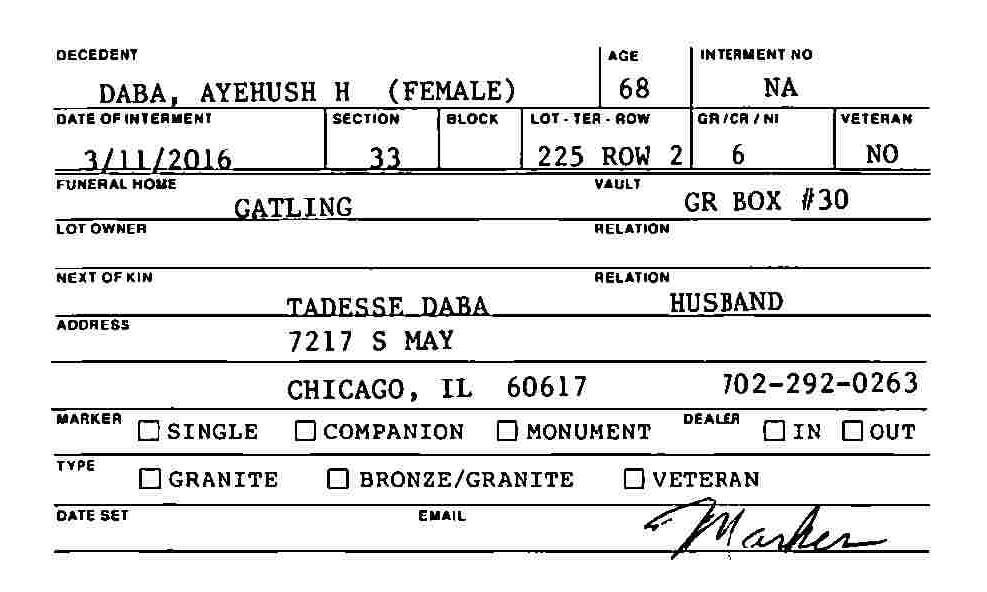

In [1]:
# View Example Image

from IPython.display import Image
Image(filename='../OneDrive_1_11-6-2019/iCard_021873_1_Daba_Ayehush_H.jpg') 

In [3]:
# Simple image_to_string to verify Tesseract installation is working

import pytesseract
from PIL import Image

img = Image.open('../OneDrive_1_11-6-2019/iCard_021873_1_Daba_Ayehush_H.jpg')
pytesseract.pytesseract.tesseract_cmd = 'tesseract'
print( pytesseract.image_to_string(img) )

    
    

DECEDENT AGE

DABA, AYEHUSH H_ (FEMALE) 68

DATE OF INTERMENT SECTION LOT-TER- ROW

225 ROW 2

FUNERAL HOME VAULT

INTERMENT NO.

NA

GR/CA/ NI

6

      
      

   

VETERAN

    

 

 

 

TLING GR BOX #30
LOT OWNER RELATION
NEXT OF KIN RELATION
TADESSE DABA HUSBAND
ADDRESS
7217 S MAY
CHICAGO, IL 60617 702-292-0263
MARKER SINGLE (CICOMPANION OmonuMENT "““" C)in Clout
mre cranrte (1 BRONZE/GRANITE 0 VETERAN
DATE SET EMAIL

o

LG



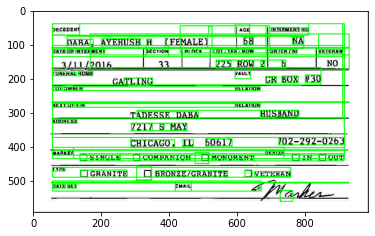

In [4]:
# Showing Tesseracts image to data functionality to show bounding boxes

import pytesseract
from pytesseract import Output
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('../OneDrive_1_11-6-2019/iCard_021873_1_Daba_Ayehush_H.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)
plt.show()

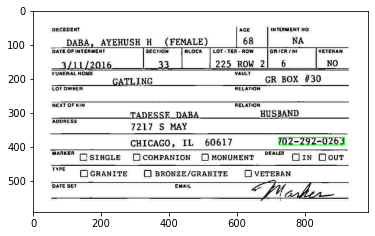

In [5]:
# Locating specific patterns in the results

import re
import cv2
import pytesseract
from matplotlib import pyplot as plt
from pytesseract import Output

img = cv2.imread('../OneDrive_1_11-6-2019/iCard_021873_1_Daba_Ayehush_H.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

phone_pattern = '^(\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]\d{3}[\s.-]\d{4}$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
#         print(d['text'][i])
        if re.match(phone_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)
plt.show()

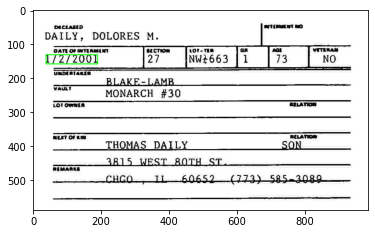

In [6]:
# Searching for Date tokens

import re
import cv2
import pytesseract
from matplotlib import pyplot as plt
from pytesseract import Output
from dateutil import parser

img = cv2.imread('../OneDrive_1_11-6-2019/iCard_021961_1_Daily_Dolores_M.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
#     print(d['text'][i])
#     print(d['conf'][i])
    if int(d['conf'][i]) > 60 and len(d['text'][i]) > 6:
#         print(d['text'][i])
        try:
            date_str = parser.parse(d['text'][i])
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        except:
            pass

plt.imshow(img)
plt.show()

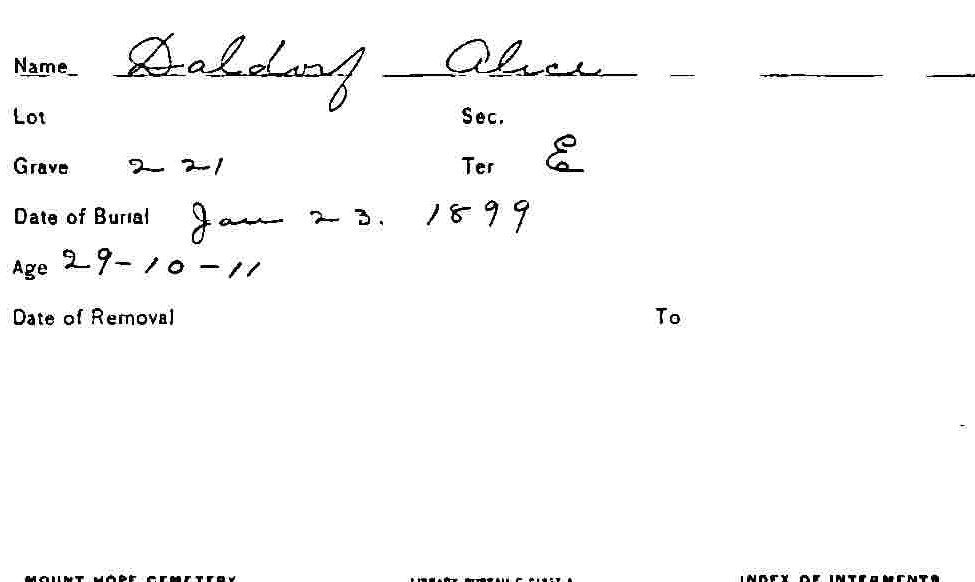

In [7]:
# Handwritten example

from IPython.display import Image
Image(filename='../OneDrive_1_11-6-2019/iCard_021992_1_DALDORF_ALICE.jpg') 

# Clustering Attempt

From the Docs:

- JPG Forms: 2 different Forms (B1,B2)
- JPG  Form: 1 handwritten Form  (B3)-  Note: may have  10 % to 30%  of total records by classified as “handwritten”
- PDF Form: 1 Form (B4) – no samples provided

There are 3 types in the training set, the below code tries to group the input training set into clusters by type

In [8]:
# Clustering Attempt - This uses VGG16 a Convolutional Neural Network trained on ImageNet data to predict
# 1000 different image classifications. Some the output predictions of the VGG16 model this performs 
# K-means clustering with 3 clusters to try to sort the forms into alike clusters.

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

# Variables
imdir = '../OneDrive_1_11-6-2019/'
targetdir = "../Clusters/"
number_clusters = 3

# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*.jpg'))
filelist.sort()
featurelist = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

# Clustering
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))

# Copy images renamed by cluster 
# Check if target dir exists
os.makedirs(targetdir, exist_ok=True)
# Copy with cluster name
print("\n")
for i, m in enumerate(kmeans.labels_):
    os.makedirs(f"{targetdir}{m}", exist_ok=True)
    print(filelist[i])
    print("    Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], f"{targetdir}{m}/{filelist[i].split('/')[-1]}")

    Status: 119 / 120

../OneDrive_1_11-6-2019/iCard_021873_1_Daba_Ayehush_H.jpg
../OneDrive_1_11-6-2019/iCard_021874_1_Daba_Lemanee.jpg
../OneDrive_1_11-6-2019/iCard_021875_1_Daba_Shorro.jpg
../OneDrive_1_11-6-2019/iCard_021876_1_Dabe_Patricia_Jean.jpg
../OneDrive_1_11-6-2019/iCard_021877_1_Dabney_Abraham_L.jpg
../OneDrive_1_11-6-2019/iCard_021878_1_DABNEY_ERWIN_OTIS.jpg
../OneDrive_1_11-6-2019/iCard_021879_1_Dabney_Florence_S.jpg
../OneDrive_1_11-6-2019/iCard_021880_1_Dabney_Frances.jpg
../OneDrive_1_11-6-2019/iCard_021881_1_Dabney_Jermaine_Lemont.jpg
../OneDrive_1_11-6-2019/iCard_021882_1_Dabney_Martha.jpg
../OneDrive_1_11-6-2019/iCard_021883_1_Dabney_Moses.jpg
../OneDrive_1_11-6-2019/iCard_021884_1_Dabney_Thaddeus_W.jpg
../OneDrive_1_11-6-2019/iCard_021885_1_Dabney_Thomas.jpg
../OneDrive_1_11-6-2019/iCard_021886_1_Dace_Frank.jpg
../OneDrive_1_11-6-2019/iCard_021887_1_Dackerman_Conrad.jpg
../OneDrive_1_11-6-2019/iCard_021888_1_Daddio_Sylvia.jpg
../OneDrive_1_11-6-2019/iCard_021889_1

In [12]:
# Example of the VGG16 prediction. This shows the top classification

# Loop over files and get features
imagepath = "../OneDrive_1_11-6-2019/iCard_021879_1_Dabney_Florence_S.jpg"
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img(imagepath, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
for i in range(5):
    top_label = label[0][i]
    # print the classification
    print('%s (%.2f%%)' % (top_label[1], top_label[2]*100))

web_site (32.61%)
rule (11.58%)
slide_rule (9.83%)
hand-held_computer (9.57%)
menu (5.72%)


# Further Clustering

If you open the scratch pad we were using `pytesseract-scratch.ipynb`, you will see that we tried to further break down the clusters into handwritten vs. typed. We were not able to accomplish the clustering this way with this technique or any technique tried. We left out the code here, but all scratch work is available in the other notebook.

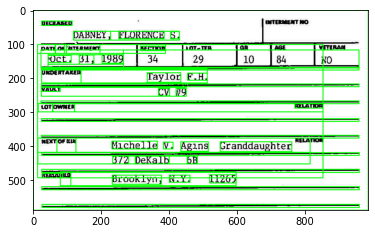

In [13]:
# Trying different permutations on the pytesseract config - this does not do much here, but we do rely on
# sending a particular config later on in the analysis

# PSM is the Page Segmentation Method - https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html#page-segmentation-method

import pytesseract
from pytesseract import Output
import cv2
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = 'tesseract'


img = cv2.imread('../OneDrive_1_11-6-2019/iCard_021879_1_Dabney_Florence_S.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT, config=r'--psm 3 --oem 1')
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)
plt.show()

In [14]:
# Collecting lines using pytesseract image_to_data

import pytesseract
from pytesseract import Output
import cv2
from matplotlib import pyplot as plt
import pprint

pytesseract.pytesseract.tesseract_cmd = 'tesseract'


img = cv2.imread('../OneDrive_1_11-6-2019/iCard_021879_1_Dabney_Florence_S.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
# pprint.pprint(d)
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if d['word_num'][i] > 1:
            print(d['text'][(i-(d['word_num'][i]-1)):i])

['DABNEY,']
['DABNEY,', 'FLORENCE']
[' ']
['DATE']
['DATE', 'OF', '‘SSTERMERT']
['Oct.']
['Oct.', '31,']
['UNDERTAKER']
['UNDERTAKER', 'Taylor']
['VAULT']
['VAULT', 'CV']
['LOT', 'OWNER']
['MEAT', 'OFEM']
['MEAT', 'OFEM', 'Michelle']
['MEAT', 'OFEM', 'Michelle', 'V.']
['372']
['372', 'DeKalb']
['ns']
['ns', 'Brooklyn,']
['ns', 'Brooklyn,', 'N.Y.']


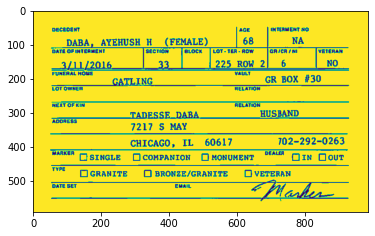

In [15]:
# Some of the things we tried for preprocessing

# Removing noise
# Binarizing the image and remove noise using Otsu's method

import re
import cv2
import pytesseract
from matplotlib import pyplot as plt
from pytesseract import Output

im_gray = cv2.imread('../OneDrive_1_11-6-2019/iCard_021873_1_Daba_Ayehush_H.jpg', cv2.IMREAD_GRAYSCALE)

(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(im_bw)
plt.show()

In [16]:
# Using tesseract on the binarized image 

import re
import cv2
import pytesseract
from matplotlib import pyplot as plt
from pytesseract import Output

im_gray = cv2.imread('../OneDrive_1_11-6-2019/iCard_021873_1_Daba_Ayehush_H.jpg', cv2.IMREAD_GRAYSCALE)

(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

pytesseract.pytesseract.tesseract_cmd = 'tesseract'
print( pytesseract.image_to_string(im_bw) )

      
   

       
    

 

   

 

 

DECEDENT ace INTERMENT NO
DABA, AYEHUSH H (FEMALE) 68 NA
DATE OF INTERMENT SECTION LOT-TER-@OW  |GRICA/AI VETERAN
225 ROW 2 6
FUNERAL HOME TLING VauLT GR BOK #30
LOT OWNER RELATION
NEXT OF KIN RELATION
ADESSE_DABA HUSBAND

ADORESS

7217 S MAY

CHICAGO, IL 60617 102-292-0263
MARKER DEAUER

CSINGLE [COMPANION [1 MONUMENT Ox Qoutr

mre cranrte (7 BRONZE/GRANITE 0 VETERAN

DATE SET EMAIL a

 

LG



In [17]:
# Running pytesseract image_to_string on aall files in the directory and saving the results to a csv as
# the first full attempt of OCR on all images

import re
import pandas as pd
import cv2
import pytesseract
from matplotlib import pyplot as plt
from pytesseract import Output
import os

all_text_detections = []
files = os.listdir("../OneDrive_1_11-6-2019")

i = 1
for filename in files:
    print(filename)
    if not os.path.isfile(f"../OneDrive_1_11-6-2019/{filename}"):
        continue
        
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        continue

    im_gray = cv2.imread(f"../OneDrive_1_11-6-2019/{filename}", cv2.IMREAD_GRAYSCALE)

    (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    pytesseract.pytesseract.tesseract_cmd = 'tesseract'
    text = pytesseract.image_to_string(im_bw)
    text_detection = {
        "filename": filename,
        "text": text
    }
    print(f"{i} / {len(files)} Processed")
    i += 1
    all_text_detections.append(text_detection)
    

df = pd.DataFrame(all_text_detections)

df.to_csv("first_attempt_tesseract.csv")

iCard_021875_1_Daba_Shorro.jpg
1 / 123 Processed
iCard_021960_1.jpg
2 / 123 Processed
iCard_021912_1_Dahlberg_John.jpg
3 / 123 Processed
iCard_021894_1_Daehn_Herman_W.jpg
4 / 123 Processed
iCard_021936_1_Dahlstrom_Violet.jpg
5 / 123 Processed
iCard_021977_1_Daker_Raphael.jpg
6 / 123 Processed
iCard_021988_1_Dako_Martha.jpg
7 / 123 Processed
iCard_021906_1_Dagdigian_Robert.jpg
8 / 123 Processed
iCard_021927_1_Dahlstrom_Anna.jpg
9 / 123 Processed
iCard_021982_1_Dakin_Hannah_Lois.jpg
10 / 123 Processed
iCard_021895_1_Daemicke_George_F.jpg
11 / 123 Processed
iCard_021987_1_Dako_Caroline.uzn
iCard_021908_1_Dagdigian.jpg
12 / 123 Processed
iCard_021914_1_Dahleen_Robert_Charles.jpg
13 / 123 Processed
iCard_021911_1_Daggs_Ernest.jpg
14 / 123 Processed
iCard_021917_1_Dahlem_Roy_A.jpg
15 / 123 Processed
iCard_021942_1_Dahne_Richard.jpg
16 / 123 Processed
iCard_021975_1_Daker_Laura.jpg
17 / 123 Processed
iCard_021934_1_Dahlstrom_Ragnar_F.jpg
18 / 123 Processed
iCard_021976_1_Daker_Ralph.jpg
19 / 

# Segmenting the Image

The first 2 cells here show some of the first ways we tried to segment the image to see if we could break down the form into each input section. For Form B3 we tried to separate it by the lines in the form using various methods, but ultimately landed on using Zonal OCR already built into Tesseract

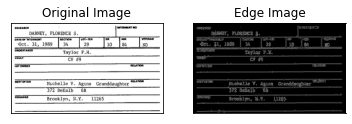

In [18]:
# Simple Edge Detection

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../OneDrive_1_11-6-2019/iCard_021879_1_Dabney_Florence_S.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

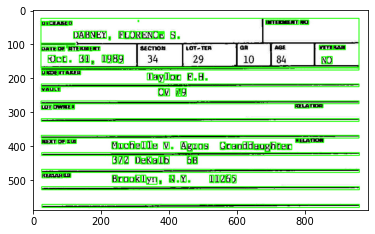

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image, grayscale, Otsu's threshold 
image = cv2.imread('../OneDrive_1_11-6-2019/iCard_021879_1_Dabney_Florence_S.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1
    
plt.imshow(image)
plt.show()  

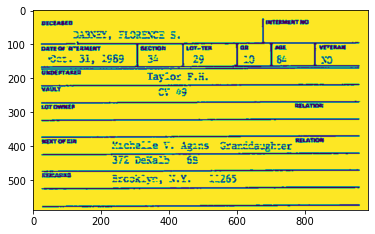

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('../OneDrive_1_11-6-2019/iCard_021879_1_Dabney_Florence_S.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

k1 = (4,1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, k1)
im = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel, iterations=1)

_,im = cv2.threshold(im, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

plt.imshow(im)
plt.show()  

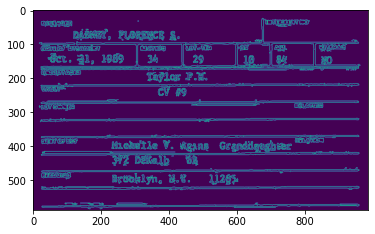

In [21]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('../OneDrive_1_11-6-2019/iCard_021879_1_Dabney_Florence_S.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 50, 200, 1)

cnts = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10000 and area < 15000:
        cv2.drawContours(image, [c], 0, (36,255,12), 2)

plt.imshow(canny)
plt.show()  

# Breakthrough - Zonal OCR

After reading many different articles and blogs on improving OCR performance we came across Zonal OCR. Tesseract supports Zonal OCR using a uzn or zone file. There is not rich information about this online, but it is natively supported in tesseract. 


There is a great tool online called [Kull](https://jsoma.github.io/kull/#/) for creating UZN (Zone files) which are very simple files in the form of:

```
left1, top1, width1, height1, name1
left2, top2, width2, height2, name2
left3, top3, width3, height3, name3
.
.
.
```

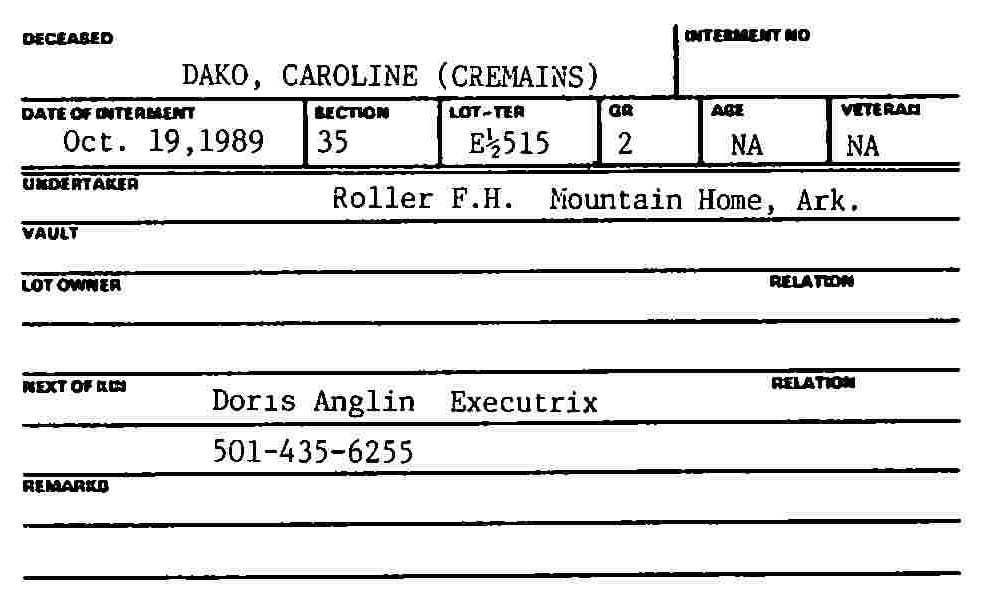

In [22]:
# Pre-Zonal image_to_string

from IPython.display import Image
Image(filename='../OneDrive_1_11-6-2019/iCard_021987_1_Dako_Caroline.jpg') 

In [23]:
import pytesseract
from PIL import Image

img = Image.open('../OneDrive_1_11-6-2019/iCard_021987_1_Dako_Caroline.jpg')
pytesseract.pytesseract.tesseract_cmd = 'tesseract'
print( pytesseract.image_to_string(img) )

 
 
   

DECEASED (NTERMENT HO

   

DAKO, CAROLINE (CREMAINS)
DATE OF ONTEALAENT RECTION LOT-TER aa "AGE
mois _|2 | Na

Oct. 19,1989
Roller F.H. Mountain Home, Ark,

  

varerar

 

 

UNDERTAKER

 

WAULT

 

LOT OWNER RELATION

 

 

WEXT OF RES RELATION

Doris Anglin Executrix
501-435-6255

 

 

REMARED

 

 



In [26]:
# With Zonal OCR - Zone2 is the file for files in Cluster 2 or Form B2

import pytesseract
from PIL import Image
from shutil import copyfile
import os

filename = "iCard_021987_1_Dako_Caroline"
copyfile(f"../OneDrive_1_11-6-2019/{filename}.jpg", f"./{filename}.jpg")
copyfile("../Clusters/Zone2.uzn", f"./{filename}.uzn")

img = Image.open(f"../OneDrive_1_11-6-2019/{filename}.jpg")
pytesseract.pytesseract.tesseract_cmd = 'tesseract'
# print( pytesseract.image_to_string(img, config=f"../Clusters/uzn/{filename}.uzn --psm 4") )
print(pytesseract.image_to_string(f"./{filename}.jpg", config=f"--psm 4"))

os.remove(f"./{filename}.jpg")
os.remove(f"./{filename}.uzn")

DAKO, CAROLINE (CREMAINS)

Oct. 19,1989

35

E4515

2

NA {

NA

Roller F.H. Mountain Home, Ark,

ui

————

Doris Anglin Ex

acutrix

—_—<$__$_$_ $$ —— ——— $< —— ere
501-435-6255



In [27]:
# Using Zonal OCR on Cluster 0

# The code at the bottom takes the bounding box from the output of image_to_data and sees if its contained in 
# the zone specified in the UZN file

import pytesseract
from PIL import Image
from shutil import copyfile
import os

import importlib
importlib.reload(pytesseract)

import string
char_whitelist = string.digits
char_whitelist += string.ascii_lowercase
char_whitelist += string.ascii_uppercase

print (os.getcwd())

files = os.listdir("../Clusters/0")

transcriptions = []
transcription_confidences = []

i = 1
for filename in files:
    print(filename)
    if not os.path.isfile(f"../OneDrive_1_11-6-2019/{filename}"):
        continue
        
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        continue
    filename = filename.split(".")[0]
    copyfile(f"../OneDrive_1_11-6-2019/{filename}.jpg", f"./{filename}.jpg")
    copyfile("../Clusters/Zone0.uzn", f"./{filename}.uzn")

    img = Image.open(f"../OneDrive_1_11-6-2019/{filename}.jpg")
    pytesseract.pytesseract.tesseract_cmd = 'tesseract'
    # print( pytesseract.image_to_string(img, config=f"../Clusters/uzn/{filename}.uzn --psm 4") )
    d = pytesseract.image_to_data(f"./{filename}.jpg", config=f"-c tessedit_char_whitelist=\" {char_whitelist}-\" --psm 4", output_type=Output.DICT)
    os.remove(f"./{filename}.jpg")
    os.remove(f"./{filename}.uzn")
    uzn = open("../Clusters/Zone0.uzn", "r")

    zone_bounds = []
    zones = []
    for l in uzn.readlines():
        line = l.split(" ")
        zones.append(line[-1].strip())
        # (Left, Top, Right, Bottom)
        zone_bounds.append((int(line[0]), int(line[1]), int(line[0]) + int(line[2]), int(line[1]) + int(line[3])))
    # print(d)
    n_boxes = len(d['level'])


    grace = 20
    zone_to_text_map = {}
    zone_to_text_map["filename"] = filename
    for zone in zones:
        zone_to_text_map[zone] = ""
        zone_to_text_map[f"{zone}_conf"] = []

    for i in range(n_boxes):
        if not d['text'][i]:
            continue
        bounds = (d['left'][i], d['top'][i], d['left'][i] + d['width'][i], d['top'][i] + d['height'][i])
        for j, zone in enumerate(zone_bounds):
            # Check to see if box is in the zone bounds
            if (bounds[0] >= zone[0] and bounds[0] <= zone[2]) \
                and (bounds[1] >= zone[1] - grace and bounds[1] <= zone[3] + grace) \
                and (bounds[2] >= zone[0] - grace and bounds[2] <= zone[2] + grace) \
                and (bounds[3] >= zone[1] - grace and bounds[3] <= zone[3] + grace):
#                 print(f"Box is in zone {zones[j]}")
                zone_to_text_map[zones[j]] = f"{zone_to_text_map[zones[j]]} {d['text'][i]}"
                zone_to_text_map[f"{zones[j]}_conf"].append(d['conf'][i])

    transcriptions.append(zone_to_text_map)
    
import pandas as pd

df = pd.DataFrame(transcriptions)

df.to_csv("zonal_ocr_pytesseract.csv")

/Users/perkinsc/Documents/Northeastern/EAI6020/eai6020/notebooks
iCard_021894_1_Daehn_Herman_W.jpg
iCard_021936_1_Dahlstrom_Violet.jpg
iCard_021988_1_Dako_Martha.jpg
iCard_021906_1_Dagdigian_Robert.jpg
iCard_021927_1_Dahlstrom_Anna.jpg
iCard_021914_1_Dahleen_Robert_Charles.jpg
iCard_021917_1_Dahlem_Roy_A.jpg
iCard_021934_1_Dahlstrom_Ragnar_F.jpg
iCard_021921_1_Dahlin_Anna_V.jpg
iCard_021985_1_Dako_Andrew.jpg
iCard_021909_1_Dagger_Sr_James_R.jpg
iCard_021919_1_Dahlgren_Alice.jpg
iCard_021928_1_Dahlstrom_Carl_E.jpg
iCard_021986_1_Dako_Andrew.jpg
iCard_021923_1_Dahlin_Victor_D.jpg
iCard_021931_1_Dahlstrom_Elmer_W.jpg
iCard_021924_1_Dahlke_Bertha.jpg
iCard_021954_1_Dailey_Margaret.jpg
iCard_021970_1_Dainty_Ollie_M.jpg
iCard_021932_1_Dahlstrom_Esther.jpg
iCard_021946_1_Dahnke_Mae_Caroline.jpg
iCard_021962_1_Daily_Ruth.jpg
iCard_021939_1_Dahn_Catherine.jpg
iCard_021940_1_Dahn_Edward_H.jpg
iCard_021981_1_Dakin_Panny.jpg
iCard_021937_1_Dahm_Albert_J.jpg
iCard_021893_1_Daehn_Emma.jpg
iCard_0219

In [28]:
# View the results

import pandas as pd

confidence_df = pd.read_csv("zonal_ocr_pytesseract.csv")

confidence_df.head()

,Unnamed: 0,filename,Name,Name_conf,Lot,Lot_conf,Section,Section_conf,Grave,Grave_conf,Terrace,Terrace_conf,DateOfBurial,DateOfBurial_conf,Age,Age_conf,DateOfRemoval,DateOfRemoval_conf,DateOfReburial,DateOfReburial_conf
0,0,iCard_021894_1_Daehn_Herman_W,Daehn Herman W,"[94, 93, 0]",79,[89],3,[88],NaN,[],NaN,[],July 31 1961,"[91, 70, 73]",69 yrse,"[31, 31]",NaN,[],NaN,[]
1,1,iCard_021936_1_Dahlstrom_Violet,Dahistrom Violet,"[85, 95]",340,[96],35,[96],NaN,[],NaN,[],August 23 1965,"[91, 91, 8]",52,[84],NaN,[],NaN,[]
2,2,iCard_021988_1_Dako_Martha,Dako Martha,"[95, 96]",541,[50],35,[94],H2,[0],NaN,[],October 6 1960,"[92, 92, 96]",70 yrs,"[54, 0]",NaN,[],NaN,[]
3,3,iCard_021906_1_Dagdigian_Robert,Dagdigian Robert,"[61, 96]",NWS 178,"[43, 88]",19A,[88],NaN,[],NaN,[],Feb 23 1956,"[0, 91, 96]",61 yrse,"[58, 67]",NaN,[],NaN,[]
4,4,iCard_021927_1_Dahlstrom_Anna,Dahlatron Anna,"[76, 95]",E4 503,"[0, 92]",19,[96],NaN,[],NaN,[],Jan 2 1951,"[0, 92, 84]",83 vree,"[84, 20]",NaN,[],To,[94]


In [33]:
# Insert results in SQLite db in addition to CSV

import sqlite3
conn = sqlite3.connect('transcriptions.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS transcriptions
         (filename, decendent, age, date_of_burial, lot, section, grave)''')

In [34]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('transcriptions.db')
c = conn.cursor()

transcriptions = pd.read_csv("zonal_ocr_pytesseract.csv")
transcriptions = transcriptions.to_dict(orient='records')

for row in transcriptions:
    c.execute(f"""
        INSERT INTO transcriptions (filename, decendent, age, date_of_burial, lot, section, grave)
                  values('{row.get('filename')}', '{row.get('Name')}', '{row.get('Age')}', 
                  '{row.get('DateOfBurial')}', '{row.get('Lot')}', '{row.get('Section')}', 
                  '{row.get('Grave')}')
    """)
conn.commit()

In [45]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('transcriptions.db')
c = conn.cursor()

c.execute(f"""
    SELECT * FROM transcriptions
""")

transcriptions_df = pd.DataFrame(c.fetchall())
field_names = [i[0] for i in c.description]
transcriptions_df.columns = field_names

transcriptions_df.head()

,filename,decendent,age,date_of_burial,lot,section,grave
0,iCard_021894_1_Daehn_Herman_W,Daehn Herman W,69 yrse,July 31 1961,79,3,nan
1,iCard_021936_1_Dahlstrom_Violet,Dahistrom Violet,52,August 23 1965,340,35,nan
2,iCard_021988_1_Dako_Martha,Dako Martha,70 yrs,October 6 1960,541,35,H2
3,iCard_021906_1_Dagdigian_Robert,Dagdigian Robert,61 yrse,Feb 23 1956,NWS 178,19A,nan
4,iCard_021927_1_Dahlstrom_Anna,Dahlatron Anna,83 vree,Jan 2 1951,E4 503,19,nan


In [46]:
# Repeat for Clusters 1 and 2

import pytesseract
from PIL import Image
from shutil import copyfile
import os

import importlib
importlib.reload(pytesseract)

import string
char_whitelist = string.digits
char_whitelist += string.ascii_lowercase
char_whitelist += string.ascii_uppercase

print (os.getcwd())

files = os.listdir("../Clusters/1")

transcriptions = []
transcription_confidences = []

i = 1
for filename in files:
    print(filename)
    if not os.path.isfile(f"../OneDrive_1_11-6-2019/{filename}"):
        continue
        
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        continue
    filename = filename.split(".")[0]
    copyfile(f"../OneDrive_1_11-6-2019/{filename}.jpg", f"./{filename}.jpg")
    copyfile("../Clusters/Zone1.uzn", f"./{filename}.uzn")

    img = Image.open(f"../OneDrive_1_11-6-2019/{filename}.jpg")
    pytesseract.pytesseract.tesseract_cmd = 'tesseract'
    # print( pytesseract.image_to_string(img, config=f"../Clusters/uzn/{filename}.uzn --psm 4") )
    d = pytesseract.image_to_data(f"./{filename}.jpg", config=f"-c tessedit_char_whitelist=\" {char_whitelist}-\" --psm 4", output_type=Output.DICT)
    os.remove(f"./{filename}.jpg")
    os.remove(f"./{filename}.uzn")
    uzn = open("../Clusters/Zone1.uzn", "r")

    zone_bounds = []
    zones = []
    for l in uzn.readlines():
        line = l.split(" ")
        zones.append(line[-1].strip())
        # (Left, Top, Right, Bottom)
        zone_bounds.append((int(line[0]), int(line[1]), int(line[0]) + int(line[2]), int(line[1]) + int(line[3])))
    # print(d)
    n_boxes = len(d['level'])


    grace = 20
    zone_to_text_map = {}
    zone_to_text_map["filename"] = filename
    for zone in zones:
        zone_to_text_map[zone] = ""
        zone_to_text_map[f"{zone}_conf"] = []

    for i in range(n_boxes):
        if not d['text'][i]:
            continue
        bounds = (d['left'][i], d['top'][i], d['left'][i] + d['width'][i], d['top'][i] + d['height'][i])
        for j, zone in enumerate(zone_bounds):
            # Check to see if box is in the zone bounds
            if (bounds[0] >= zone[0] and bounds[0] <= zone[2]) \
                and (bounds[1] >= zone[1] - grace and bounds[1] <= zone[3] + grace) \
                and (bounds[2] >= zone[0] - grace and bounds[2] <= zone[2] + grace) \
                and (bounds[3] >= zone[1] - grace and bounds[3] <= zone[3] + grace):
#                 print(f"Box is in zone {zones[j]}")
                zone_to_text_map[zones[j]] = f"{zone_to_text_map[zones[j]]} {d['text'][i]}"
                zone_to_text_map[f"{zones[j]}_conf"].append(d['conf'][i])

    transcriptions.append(zone_to_text_map)
    
import pandas as pd

df = pd.DataFrame(transcriptions)

df.to_csv("zonal_ocr_pytesseract_cluster1.csv")

/Users/perkinsc/Documents/Northeastern/EAI6020/eai6020/notebooks
iCard_021960_1.jpg
iCard_021912_1_Dahlberg_John.jpg
iCard_021977_1_Daker_Raphael.jpg
iCard_021895_1_Daemicke_George_F.jpg
iCard_021908_1_Dagdigian.jpg
iCard_021942_1_Dahne_Richard.jpg
iCard_021975_1_Daker_Laura.jpg
iCard_021976_1_Daker_Ralph.jpg
iCard_021896_1_Daemicke_Ernestine.jpg
iCard_021984_1_Dakin_Peter.jpg
iCard_021964_1_Dainty_Anna.jpg
iCard_021992_1_DALDORF_ALICE.jpg
iCard_021973_1_Daken_Thadoleus.jpg
iCard_021922_1_Dahlin_Victor.jpg
iCard_021916_1_Dahlem_Emma.jpg
iCard_021938_1_Dahms_William.jpg
iCard_021979_1_Daker_Sarah.jpg
iCard_021943_1_Dahnel_Thekla.jpg
iCard_021935_1_Dahlstrom_Rudolph_Andrew.jpg
iCard_021978_1_Daker_Sarah.jpg
iCard_021944_1_Dahnke_Emma.jpg
iCard_021880_1_Dabney_Frances.jpg
iCard_021990_1_DALBIER_ELIZABETH.jpg
iCard_021969_1_Dainty_Katherine_B.jpg
iCard_021904_1_Daft_Edgar_H.jpg
iCard_021929_1_Dahlstrom_Carl.jpg
iCard_021887_1_Dackerman_Conrad.jpg
iCard_021925_1_Dahlke_Reinhold.jpg
iCard_02

In [47]:
# Doing Cluster 2 without any preprocessing

import pytesseract
from PIL import Image
from shutil import copyfile
import os

import importlib
importlib.reload(pytesseract)

import string
char_whitelist = string.digits
char_whitelist += string.ascii_lowercase
char_whitelist += string.ascii_uppercase

print (os.getcwd())

files = os.listdir("../Clusters/2")

transcriptions = []
transcription_confidences = []

i = 1
for filename in files:
    print(filename)
    if not os.path.isfile(f"../OneDrive_1_11-6-2019/{filename}"):
        continue
        
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        continue
    filename = filename.split(".")[0]
    copyfile(f"../OneDrive_1_11-6-2019/{filename}.jpg", f"./{filename}.jpg")
    copyfile("../Clusters/Zone2.uzn", f"./{filename}.uzn")

    img = Image.open(f"../OneDrive_1_11-6-2019/{filename}.jpg")
    pytesseract.pytesseract.tesseract_cmd = 'tesseract'
    # print( pytesseract.image_to_string(img, config=f"../Clusters/uzn/{filename}.uzn --psm 4") )
    d = pytesseract.image_to_data(f"./{filename}.jpg", config=f"-c tessedit_char_whitelist=\" {char_whitelist}-\" --psm 4", output_type=Output.DICT)
    
    os.remove(f"./{filename}.jpg")
    os.remove(f"./{filename}.uzn")
    uzn = open("../Clusters/Zone2.uzn", "r")
    
    

    zone_bounds = []
    zones = []
    for l in uzn.readlines():
        line = l.split(" ")
        zones.append(line[-1].strip())
        # (Left, Top, Right, Bottom)
        zone_bounds.append((int(line[0]), int(line[1]), int(line[0]) + int(line[2]), int(line[1]) + int(line[3])))
    # print(d)
    n_boxes = len(d['level'])


    grace = 20
    zone_to_text_map = {}
    zone_to_text_map["filename"] = filename
    for zone in zones:
        zone_to_text_map[zone] = ""
        zone_to_text_map[f"{zone}_conf"] = []

    for i in range(n_boxes):
        if not d['text'][i]:
            continue
        bounds = (d['left'][i], d['top'][i], d['left'][i] + d['width'][i], d['top'][i] + d['height'][i])
        for j, zone in enumerate(zone_bounds):
            # Check to see if box is in the zone bounds
            if (bounds[0] >= zone[0] and bounds[0] <= zone[2]) \
                and (bounds[1] >= zone[1] - grace and bounds[1] <= zone[3] + grace) \
                and (bounds[2] >= zone[0] - grace and bounds[2] <= zone[2] + grace) \
                and (bounds[3] >= zone[1] - grace and bounds[3] <= zone[3] + grace):
#                 print(f"Box is in zone {zones[j]}")
                zone_to_text_map[zones[j]] = f"{zone_to_text_map[zones[j]]} {d['text'][i]}"
                zone_to_text_map[f"{zones[j]}_conf"].append(d['conf'][i])

    transcriptions.append(zone_to_text_map)
    
import pandas as pd

df = pd.DataFrame(transcriptions)

df.to_csv("zonal_ocr_pytesseract_cluster2.csv")

/Users/perkinsc/Documents/Northeastern/EAI6020/eai6020/notebooks
iCard_021875_1_Daba_Shorro.jpg
iCard_021982_1_Dakin_Hannah_Lois.jpg
iCard_021911_1_Daggs_Ernest.jpg
iCard_021955_1_Dailey_Mary.jpg
.DS_Store
iCard_021920_1_Dahlin_Anna_V.jpg
iCard_021945_1_Dahnke_Louise_Dorothy.jpg
iCard_021951_1_Dailey_Leon.jpg
iCard_021911_1_Daggs_Ernest.uzn.txt
iCard_021963_1_Daily_Scott_E.jpg
iCard_021971_1_Dairen_Golden.jpg
iCard_021874_1_Daba_Lemanee.jpg
iCard_021966_1_Dainty_Frederick_J.jpg
iCard_021907_1_Dagdigian_Rose.jpg
iCard_021989_1_Dalas_Katheleen.jpg
iCard_021876_1_Dabe_Patricia_Jean.jpg
iCard_021953_1_DAILEY_LILLIAN.jpg
iCard_021873_1_Daba_Ayehush_H.jpg
iCard_021911_1_Daggs_Ernest.uzn
iCard_021898_1_Daenitz_Cellia_E.jpg
iCard_021961_1_Daily_Dolores_M.jpg
iCard_021959_1_Dailey_Sara.jpg
iCard_021991_1_Dail-Degan_Val.uzn.txt
iCard_021891_1_Dade_Love.jpg
iCard_021987_1_Dako_Caroline.jpg
iCard_021968_1_Dainty_Katherine.jpg
iCard_021910_1_Dagger_Kennie.jpg
iCard_021957_1_Dailey_Rosa_Amanda.jpg
i

In [48]:
# View the results

import pandas as pd

confidence_df = pd.read_csv("zonal_ocr_pytesseract_cluster2.csv")

confidence_df.head()

,Unnamed: 0,filename,Deceased,Deceased_conf,IntermentNo,IntermentNo_conf,DateOfBurial,DateOfBurial_conf,Section,Section_conf,...,Vault,Vault_conf,LotOwner,LotOwner_conf,NextOfKin,NextOfKin_conf,NextOfKinRelation,NextOfKinRelation_conf,NextOfKinAddress,NextOfKinAddress_conf
0,0,iCard_021875_1_Daba_Shorro,DABA SHORRO,"[0, 86]",NaN,[],91996,[0],33,[95],...,GRAVE BOX 30,"[95, 86, 0]",NaN,[],TADESSE DABA,"[90, 0]",eee R FATA,"[0, 0, 38]",7217 S MAY CHICAGO IL 60621 py,"[80, 0, 0, 90, 95, 96, 43]"
1,1,iCard_021982_1_Dakin_Hannah_Lois,OtCeasiD f DAKIN HANNAH LOIS,"[27, 0, 91, 96, 96]",NaN,[],DATE Of meTERaci mt 1162001,"[91, 45, 0, 0, 0]",so 27,"[0, 96]",...,t GRAVE BOX 30,"[0, 96, 92, 0]",NaN,[],- GLORIA HAYWOOD Z652-W 28TH,"[0, 96, 96, 2, 0]",NaN,[],Z652-W 28TH -STR- BLUE TSLAND Tl 60406,"[2, 0, 0, 0, 28, 63, 66]"
2,2,iCard_021911_1_Daggs_Ernest,otctaseo DAGGS ERNEST,"[19, 91, 95]",NaN,[],OATH OF imTUASAL NT 52297,"[68, 83, 0, 18, 0]",SECTION 134,"[0, 39]",...,SE SS Se ee DAVE ROY 20,"[24, 50, 37, 43, 0, 91, 0]",ROY 20,"[91, 0]",me DAGGS,"[19, 55]",a W,"[0, 0]",S- LAFLIN CHGO It 60620 0,"[0, 0, 88, 24, 82, 45]"
3,3,iCard_021955_1_Dailey_Mary,DaceasiD,[15],NaN,[],BATH OF METERRGLAT,"[35, 93, 0]",jaenos i,"[0, 29]",...,W W HOLL aT,"[0, 87, 59, 57]",Ni ips en a,"[22, 35, 35, 62]",15812 HOYNE,"[91, 91]",NaN,[],HARVEY IL 60426 708 339-9146,"[0, 88, 77, 0, 95]"
4,4,iCard_021920_1_Dahlin_Anna_V,DAHLIN ANNAV,"[0, 0]",NaN,[],August 24 1989,"[0, 0, 96]",27,[38],...,NaN,[],NaN,[],er Lillian Francis,"[89, 67, 67]",NaN,[],19052 Loomis Homewood I1 60430,"[96, 92, 0, 90, 96]"


Notice in DateOfBurial that some of the records get the date recognized well, but others read in the label Date of Internment. Why is that?

Let's take look to see why.

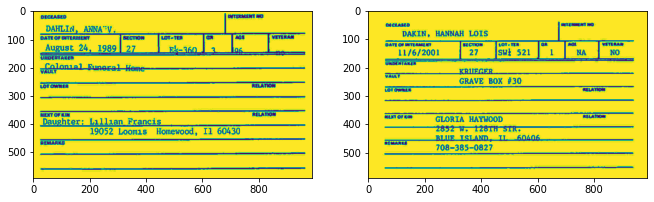

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('../OneDrive_1_11-6-2019/iCard_021920_1_Dahlin_Anna_V.jpg')
img_B = mpimg.imread('../OneDrive_1_11-6-2019/iCard_021982_1_Dakin_Hannah_Lois.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[1].imshow(img_B);

Notice the difference in the margins? Maybe the Zonal OCR would be better if we preprocessed and removed the margins

In [54]:
# This code crops the images in Cluster 2

import numpy as np
import cv2
import os

files = os.listdir("../Clusters/2")

transcriptions = []
transcription_confidences = []

i = 1
for filename in files:
    print(filename)
    if not os.path.isfile(f"../OneDrive_1_11-6-2019/{filename}"):
        continue
        
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        continue
    filename = filename.split(".")[0]

    img = cv2.imread(f"../OneDrive_1_11-6-2019/{filename}.jpg") # Read in the image and convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = 255*(gray < 128).astype(np.uint8) # To invert the text to white
    coords = cv2.findNonZero(gray) # Find all non-zero points (text)
    x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
    rect = img[y:y+h, x:x+w] # Crop the image - note we do this on the original image
    cv2.imwrite(f"../Clusters/Cropped2/{filename}_cropped.png", rect) # Save the image

iCard_021875_1_Daba_Shorro.jpg
iCard_021982_1_Dakin_Hannah_Lois.jpg
iCard_021911_1_Daggs_Ernest.jpg
iCard_021955_1_Dailey_Mary.jpg
.DS_Store
iCard_021920_1_Dahlin_Anna_V.jpg
iCard_021945_1_Dahnke_Louise_Dorothy.jpg
iCard_021951_1_Dailey_Leon.jpg
iCard_021911_1_Daggs_Ernest.uzn.txt
iCard_021963_1_Daily_Scott_E.jpg
iCard_021971_1_Dairen_Golden.jpg
iCard_021874_1_Daba_Lemanee.jpg
iCard_021966_1_Dainty_Frederick_J.jpg
iCard_021907_1_Dagdigian_Rose.jpg
iCard_021989_1_Dalas_Katheleen.jpg
iCard_021876_1_Dabe_Patricia_Jean.jpg
iCard_021953_1_DAILEY_LILLIAN.jpg
iCard_021873_1_Daba_Ayehush_H.jpg
iCard_021911_1_Daggs_Ernest.uzn
iCard_021898_1_Daenitz_Cellia_E.jpg
iCard_021961_1_Daily_Dolores_M.jpg
iCard_021959_1_Dailey_Sara.jpg
iCard_021991_1_Dail-Degan_Val.uzn.txt
iCard_021891_1_Dade_Love.jpg
iCard_021987_1_Dako_Caroline.jpg
iCard_021968_1_Dainty_Katherine.jpg
iCard_021910_1_Dagger_Kennie.jpg
iCard_021957_1_Dailey_Rosa_Amanda.jpg
iCard_021930_1_Dahlstrom_Ellen_G.jpg
iCard_021911_1_Daggs_Ernest.j

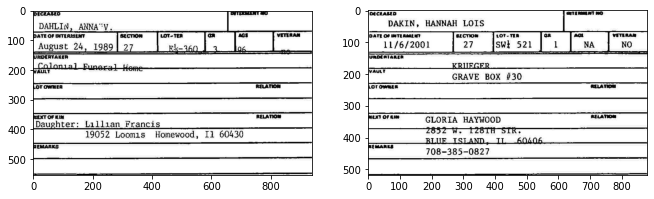

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('../Clusters/Cropped2/iCard_021920_1_Dahlin_Anna_V_cropped.png')
img_B = mpimg.imread('../Clusters/Cropped2/iCard_021982_1_Dakin_Hannah_Lois_cropped.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[1].imshow(img_B);

The margins have now been removed and the files are now more uniform in the cluster.

Time to reperform the OCR on the cropped Cluster 2

In [57]:
import pytesseract
from PIL import Image
from shutil import copyfile
import os

import importlib
importlib.reload(pytesseract)

import string
char_whitelist = string.digits
char_whitelist += string.ascii_lowercase
char_whitelist += string.ascii_uppercase

print (os.getcwd())

files = os.listdir("../Clusters/Cropped2/")

transcriptions = []
transcription_confidences = []

i = 1
for filename in files:
    print(filename)
    if not os.path.isfile(f"../Clusters/Cropped2/{filename}"):
        continue
        
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        continue
    filename = filename.split(".")[0]
    copyfile(f"../Clusters/Cropped2/{filename}.png", f"./{filename}.png")
    copyfile("../Clusters/ZoneCropped2.uzn", f"./{filename}.uzn")

    img = Image.open(f"../Clusters/Cropped2/{filename}.png")
    pytesseract.pytesseract.tesseract_cmd = 'tesseract'
    # print( pytesseract.image_to_string(img, config=f"../Clusters/uzn/{filename}.uzn --psm 4") )
    d = pytesseract.image_to_data(f"./{filename}.png", config=f"-c tessedit_char_whitelist=\" {char_whitelist}-\" --psm 4", output_type=Output.DICT)
    os.remove(f"./{filename}.png")
    os.remove(f"./{filename}.uzn")
    uzn = open("../Clusters/ZoneCropped2.uzn", "r")

    zone_bounds = []
    zones = []
    for l in uzn.readlines():
        line = l.split(" ")
        zones.append(line[-1].strip())
        # (Left, Top, Right, Bottom)
        zone_bounds.append((int(line[0]), int(line[1]), int(line[0]) + int(line[2]), int(line[1]) + int(line[3])))
    # print(d)
    n_boxes = len(d['level'])


    grace = 20
    zone_to_text_map = {}
    zone_to_text_map["filename"] = filename
    for zone in zones:
        zone_to_text_map[zone] = ""
        zone_to_text_map[f"{zone}_conf"] = []

    for i in range(n_boxes):
        if not d['text'][i]:
            continue
        bounds = (d['left'][i], d['top'][i], d['left'][i] + d['width'][i], d['top'][i] + d['height'][i])
        for j, zone in enumerate(zone_bounds):
            # Check to see if box is in the zone bounds
            if (bounds[0] >= zone[0] and bounds[0] <= zone[2]) \
                and (bounds[1] >= zone[1] - grace and bounds[1] <= zone[3] + grace) \
                and (bounds[2] >= zone[0] - grace and bounds[2] <= zone[2] + grace) \
                and (bounds[3] >= zone[1] - grace and bounds[3] <= zone[3] + grace):
#                 print(f"Box is in zone {zones[j]}")
                zone_to_text_map[zones[j]] = f"{zone_to_text_map[zones[j]]} {d['text'][i]}"
                zone_to_text_map[f"{zones[j]}_conf"].append(d['conf'][i])

    transcriptions.append(zone_to_text_map)
    
import pandas as pd

df = pd.DataFrame(transcriptions)

df.to_csv("zonal_ocr_pytesseract_cluster2_cropped.csv")

/Users/perkinsc/Documents/Northeastern/EAI6020/eai6020/notebooks
iCard_021951_1_Dailey_Leon_cropped.png
iCard_021889_1_Dade_Choni_C_cropped.png
iCard_021888_1_Daddio_Sylvia_cropped.png
iCard_021945_1_Dahnke_Louise_Dorothy_cropped.png
iCard_021920_1_Dahlin_Anna_V_cropped.png
iCard_021957_1_Dailey_Rosa_Amanda_cropped.png
iCard_021959_1_Dailey_Sara_cropped.png
iCard_021881_1_Dabney_Jermaine_Lemont_cropped.png
iCard_021885_1_Dabney_Thomas_cropped.png
iCard_021968_1_Dainty_Katherine_cropped.png
iCard_021963_1_Daily_Scott_E_cropped.png
iCard_021883_1_Dabney_Moses_cropped.png
iCard_021873_1_Daba_Ayehush_H_cropped.png
iCard_021971_1_Dairen_Golden_cropped.png
iCard_021966_1_Dainty_Frederick_J_cropped.png
iCard_021898_1_Daenitz_Cellia_E_cropped.png
iCard_021878_1_DABNEY_ERWIN_OTIS_cropped.png
iCard_021879_1_Dabney_Florence_S_cropped.png
iCard_021874_1_Daba_Lemanee_cropped.png
iCard_021987_1_Dako_Caroline_cropped.png
iCard_021900_1_Daffin_Dorra_O_Srar_cropped.png
iCard_021950_1_Dailey_Jae_Naba_cr

In [58]:
# View the results

import pandas as pd

confidence_df = pd.read_csv("zonal_ocr_pytesseract_cluster2_cropped.csv")

confidence_df.head()

,Unnamed: 0,filename,Decedent,Decedent_conf,IntermentNo,IntermentNo_conf,DateOfBurial,DateOfBurial_conf,Section,Section_conf,...,Undertaker,Undertaker_conf,Vault,Vault_conf,LotOwner,LotOwner_conf,NextOfKin,NextOfKin_conf,NextOfKin2,NextOfKin2_conf
0,0,iCard_021951_1_Dailey_Leon_cropped,DAILEY LEON,"[91, 96]",NA,[96],7212003,[0],18,[96],...,J LEAK,"[50, 96]",GR BOX 30,"[47, 47, 0]",NaN,[],GERALDINE DAILEY SI,"[91, 88, 0]",10229 S YALE AVE Se,"[92, 82, 93, 0, 18]"
1,1,iCard_021889_1_Dade_Choni_C_cropped,E CHONI C,"[0, 64, 0]",NA,[0],3222003,[0],18,[96],...,LEAK,[96],GR BX 30,"[0, 0, 0]",NaN,[],MR MRS ANTHONY 1,"[0, 0, 96, 38]",8014 S TROY,"[84, 84, 96]"
2,2,iCard_021888_1_Daddio_Sylvia_cropped,DDIO SYLVIA,"[90, 95]",NA,[96],31410,[0],27 1,"[96, 13]",...,BEVERLY RIDGE,"[95, 96]",MONTICELLO 30,"[93, 0]",NaN,[],9701 HOYNE,"[93, 91]",CHICAGO IL 60643 773 445-8773,"[0, 92, 96, 0, 96]"
3,3,iCard_021945_1_Dahnke_Louise_Dorothy_cropped,ikey Louise Dorothy,"[0, 96, 96]",NaN,[],Feb 16 1985,"[0, 92, 96]",11,[67],...,Edgar FH,"[92, 0]",- nie 9 Grave Box,"[0, 23, 0, 96, 96]",Grave Box Mae C Dahntke,"[96, 96, 86, 37, 57]",ni Me Teai rn u MISe Lititan V,"[28, 88, 0, 67, 65, 0, 17, 0]",Me Teai u MISe Lititan V Neacock,"[88, 0, 65, 0, 17, 0, 83]"
4,4,iCard_021920_1_Dahlin_Anna_V_cropped,N ANNAV,"[0, 0]",NaN,[],August 24 1989,"[92, 91, 96]",99,[17],...,mhmRKeLLLESEE ESS SS,"[0, 0, 41]",funeral HeRe,"[32, 0]",NaN,[],NaN,[],er Lillian Francis 19052 Loomis Homewood Il 6...,"[90, 65, 12, 94, 92, 81, 50, 96]"


Date of burial looks better now, doesn't it?

Note that a new UZN file was created to create the Zones based on the normalized images.

In [59]:
# Cluster 1 and Cluster 2 transcriptions to SQLite

import pandas as pd
import sqlite3

conn = sqlite3.connect('transcriptions.db')
c = conn.cursor()

transcriptions = pd.read_csv("zonal_ocr_pytesseract_cluster1.csv")
transcriptions = transcriptions.to_dict(orient='records')

for row in transcriptions:
    c.execute(f"""
        INSERT INTO transcriptions (filename, decendent, age, date_of_burial, lot, section, grave)
                  values('{row.get('filename')}', '{row.get('Name')}', '{row.get('Age')}', 
                  '{row.get('DateOfBurial')}', '{row.get('Lot')}', '{row.get('Section')}', 
                  '{row.get('Grave')}')
    """)
conn.commit()

transcriptions = pd.read_csv("zonal_ocr_pytesseract_cluster2_cropped.csv")
transcriptions = transcriptions.to_dict(orient='records')

for row in transcriptions:
    c.execute(f"""
        INSERT INTO transcriptions (filename, decendent, age, date_of_burial, lot, section, grave)
                  values('{row.get('filename')}', '{row.get('Decedent')}', '{row.get('Age')}', 
                  '{row.get('DateOfBurial')}', '{row.get('Lot')}', '{row.get('Section')}', 
                  '{row.get('Grave')}')
    """)
conn.commit()

In [60]:
# Create table like transcriptions, but use this table to preprocess Age so we can analyze the values with Age in
# our dataset

import sqlite3
conn = sqlite3.connect('transcriptions.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS ocr
         (filename, decendent, age, date_of_burial, lot, section, grave)''')

In [61]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('transcriptions.db')
c = conn.cursor()

transcriptions = pd.read_csv("zonal_ocr_pytesseract.csv")
transcriptions = transcriptions.to_dict(orient='records')

for row in transcriptions:
    row['Age'] = ''.join(c for c in row.get("Age", "") if c.isdigit())
    
    if row.get("Age").isdigit() and int(row.get("Age")) > 120:
        row['Age'] = ''
    c.execute(f"""
        INSERT INTO ocr (filename, decendent, age, date_of_burial, lot, section, grave)
                  values('{row.get('filename')}', '{row.get('Name')}', '{row.get('Age')}', 
                  '{row.get('DateOfBurial')}', '{row.get('Lot')}', '{row.get('Section')}', 
                  '{row.get('Grave')}')
    """)
conn.commit()

transcriptions = pd.read_csv("zonal_ocr_pytesseract_cluster1.csv")
transcriptions = transcriptions.to_dict(orient='records')

for row in transcriptions:
    row['Age'] = ''.join(c for c in str(row.get("Age", "")) if c.isdigit())
    
    if row.get("Age").isdigit() and int(row.get("Age")) > 120:
        row['Age'] = ''
    c.execute(f"""
        INSERT INTO ocr (filename, decendent, age, date_of_burial, lot, section, grave)
                  values('{row.get('filename')}', '{row.get('Name')}', '{row.get('Age')}', 
                  '{row.get('DateOfBurial')}', '{row.get('Lot')}', '{row.get('Section')}', 
                  '{row.get('Grave')}')
    """)
conn.commit()

transcriptions = pd.read_csv("zonal_ocr_pytesseract_cluster2_cropped.csv")
transcriptions = transcriptions.to_dict(orient='records')

for row in transcriptions:
    row['Age'] = ''.join(c for c in str(row.get("Age", "")) if c.isdigit())
    
    if row.get("Age").isdigit() and int(row.get("Age")) > 120:
        row['Age'] = ''
    c.execute(f"""
        INSERT INTO ocr (filename, decendent, age, date_of_burial, lot, section, grave)
                  values('{row.get('filename')}', '{row.get('Decedent')}', '{row.get('Age')}', 
                  '{row.get('DateOfBurial')}', '{row.get('Lot')}', '{row.get('Section')}', 
                  '{row.get('Grave')}')
    """)
conn.commit()

In [62]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('transcriptions.db')
c = conn.cursor()

c.execute(f"""
    SELECT filename, Age FROM ocr
    WHERE Age <> ''
""")

ocr_df = pd.DataFrame(c.fetchall())
field_names = [i[0] for i in c.description]
ocr_df.columns = field_names

ocr_df.head()

,filename,age
0,iCard_021894_1_Daehn_Herman_W,69
1,iCard_021936_1_Dahlstrom_Violet,52
2,iCard_021988_1_Dako_Martha,70
3,iCard_021906_1_Dagdigian_Robert,61
4,iCard_021927_1_Dahlstrom_Anna,83
